In [1]:
import re 
import pandas as pd

In [2]:
f = open("WhatsApp Chat with Room .txt","r",encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

8/21/25, 10:38 AM - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
8/21/25, 10:34 AM - Tamal created group "Room "
8/21/25, 10:38 AM - You were added
8/21/25, 10:34 AM - Tamal added you
8/21/25, 10:35 AM - Tamal: <Media omitted>
8/21/25, 10:35 AM - Tamal: <Media omitted>
8/21/25, 10:36 AM - Sourav Sit: hmm bujlam
8/21/25, 10:36 AM - Tamal: <Media omitted>
8/21/25, 10:37 AM - Sourav Sit: dara Sobie boli olpo dara
8/21/25, 10:33 PM - Subrata Roy ( BCA ): Oi
8/21/25, 10:33 PM - Subrata Roy ( BCA ): Bollam ki
8/21/25, 10:34 PM - Subrata Roy ( BCA ): Jodi September thke suru hoy
8/21/25, 10:34 PM - Subrata Roy ( BCA ): Tle pujar por chole jbo ...
8/21/25, 10:34 PM - Subrata Roy ( BCA ): Jayga gulao aktu chinte parbo
8/21/25, 10:34 PM - Subrata Roy ( BCA ): Barite thaike ..kichu hochee na
8/21/25, 10:54 PM - Tamal: Hmm
8/31/25, 10:18 PM - Subrata Roy ( BCA ): <Media omitted>
8/31/25, 10:20 PM - Tamal: <Media omitted>
8/31

In [5]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,3},\s\d{1,2}:\d{2}\s?[AP]M\s-\s'

In [6]:
msg = re.split(pattern,data)[1:]

In [7]:
import unicodedata

clean = [
    unicodedata.normalize("NFKC", m)
    for m in re.findall(pattern, data)
]


In [8]:
df = pd.DataFrame({"user messages" : msg , "date" : clean})
df['date'] = pd.to_datetime(df['date'],format = "%m/%d/%y, %I:%M %p - ")

In [9]:
df

,user messages,date
0,Messages and calls are end-to-end encrypted. O...,2025-08-21 10:38:00
1,"Tamal created group ""Room ""\n",2025-08-21 10:34:00
2,You were added\n,2025-08-21 10:38:00
3,Tamal added you\n,2025-08-21 10:34:00
4,Tamal: <Media omitted>\n,2025-08-21 10:35:00
...,...,...
493,Subrata Roy ( BCA ): Flat Owner (Street 582).v...,2026-01-24 14:50:00
494,♾️: Take a look at this EVOFOX Katana X2 Mecha...,2026-01-24 22:14:00
495,♾️: Take a look at this kridhrish Hold up Port...,2026-01-24 22:15:00
496,"♾️: Take a look at this Rockerz 425,25H Batter...",2026-01-24 22:15:00


In [10]:
 users = []
messages = []

for msg in df['user messages']:
    entry = re.split('([\w\W]+?):\s', msg)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
            users.append("group notification")
            messages.append(entry[0])

In [11]:
# df = df.iloc[2:].reset_index(drop=True)

In [12]:
df['users']= users

In [13]:
df['messages'] = messages

In [14]:
df.head()

,user messages,date,users,messages
0,Messages and calls are end-to-end encrypted. O...,2025-08-21 10:38:00,group notification,Messages and calls are end-to-end encrypted. O...
1,"Tamal created group ""Room ""\n",2025-08-21 10:34:00,group notification,"Tamal created group ""Room ""\n"
2,You were added\n,2025-08-21 10:38:00,group notification,You were added\n
3,Tamal added you\n,2025-08-21 10:34:00,group notification,Tamal added you\n
4,Tamal: <Media omitted>\n,2025-08-21 10:35:00,Tamal,<Media omitted>\n


In [15]:
df.drop(columns = ['user messages'],inplace=True)

In [16]:
df.head()

,date,users,messages
0,2025-08-21 10:38:00,group notification,Messages and calls are end-to-end encrypted. O...
1,2025-08-21 10:34:00,group notification,"Tamal created group ""Room ""\n"
2,2025-08-21 10:38:00,group notification,You were added\n
3,2025-08-21 10:34:00,group notification,Tamal added you\n
4,2025-08-21 10:35:00,Tamal,<Media omitted>\n


In [17]:
df['year'] = df['date'].dt.year

In [18]:
df['month'] = df['date'].dt.month_name()

In [19]:
df.head()

,date,users,messages,year,month
0,2025-08-21 10:38:00,group notification,Messages and calls are end-to-end encrypted. O...,2025,August
1,2025-08-21 10:34:00,group notification,"Tamal created group ""Room ""\n",2025,August
2,2025-08-21 10:38:00,group notification,You were added\n,2025,August
3,2025-08-21 10:34:00,group notification,Tamal added you\n,2025,August
4,2025-08-21 10:35:00,Tamal,<Media omitted>\n,2025,August


In [20]:
df['day'] = df['date'].dt.day

In [21]:
df['hours'] = df['date'].dt.hour

In [22]:
df['minutes'] = df['date'].dt.minute

In [23]:
df.head()

,date,users,messages,year,month,day,hours,minutes
0,2025-08-21 10:38:00,group notification,Messages and calls are end-to-end encrypted. O...,2025,August,21,10,38
1,2025-08-21 10:34:00,group notification,"Tamal created group ""Room ""\n",2025,August,21,10,34
2,2025-08-21 10:38:00,group notification,You were added\n,2025,August,21,10,38
3,2025-08-21 10:34:00,group notification,Tamal added you\n,2025,August,21,10,34
4,2025-08-21 10:35:00,Tamal,<Media omitted>\n,2025,August,21,10,35


In [24]:
word  = []
for msg in df['messages']:
    word.extend(msg.split())

In [25]:
len(word)

1375

In [26]:
temp = df[df['users'] != "group notification"]
temp = temp[temp['messages'] != '<Media omitted>\n']

In [27]:
temp

,date,users,messages,year,month,day,hours,minutes
6,2025-08-21 10:36:00,Sourav Sit,hmm bujlam\n,2025,August,21,10,36
8,2025-08-21 10:37:00,Sourav Sit,dara Sobie boli olpo dara\n,2025,August,21,10,37
9,2025-08-21 22:33:00,Subrata Roy ( BCA ),Oi\n,2025,August,21,22,33
10,2025-08-21 22:33:00,Subrata Roy ( BCA ),Bollam ki\n,2025,August,21,22,33
11,2025-08-21 22:34:00,Subrata Roy ( BCA ),Jodi September thke suru hoy\n,2025,August,21,22,34
...,...,...,...,...,...,...,...,...
493,2026-01-24 14:50:00,Subrata Roy ( BCA ),Flat Owner (Street 582).vcf (file attached)\n,2026,January,24,14,50
494,2026-01-24 22:14:00,♾️,Take a look at this EVOFOX Katana X2 Mechanica...,2026,January,24,22,14
495,2026-01-24 22:15:00,♾️,Take a look at this kridhrish Hold up Portable...,2026,January,24,22,15
496,2026-01-24 22:15:00,♾️,"Take a look at this Rockerz 425,25H Battery, B...",2026,January,24,22,15


In [28]:
# f = open("stop_word_for_wp.txt","r",encoding = "utf-8")
# stop_words = f.read()
# print(stop_words)

In [29]:
# words = []
# for message in temp["messages"]:
#     for word in message.lower().split():
#         if word not in stop_words:
#             words.append(word)

In [30]:
# from collections import Counter
# pd.DataFrame(Counter(words).most_common(10))

In [31]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [32]:
import emoji

In [33]:
emojis = []
for messages in df["messages"]:
    emojis.extend([c for c in messages if c in emoji.EMOJI_DATA])
print(emojis)

['🤣', '🤣', '♾']


In [37]:
# pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [38]:
df.sample(5)

,date,users,messages,year,month,day,hours,minutes
301,2026-01-21 21:17:00,Subrata Roy ( BCA ),<Media omitted>\n,2026,January,21,21,17
475,2026-01-21 21:20:00,Subrata Roy ( BCA ),<Media omitted>\n,2026,January,21,21,20
104,2025-10-10 12:02:00,♾️,Acha\n,2025,October,10,12,2
353,2026-01-21 21:18:00,Subrata Roy ( BCA ),<Media omitted>\n,2026,January,21,21,18
217,2026-01-16 22:45:00,♾️,?\n,2026,January,16,22,45


In [39]:
df["month_num"] = df["date"].dt.month

In [40]:
df.sample(5)

,date,users,messages,year,month,day,hours,minutes,month_num
187,2026-01-06 18:23:00,Sourav Sit,Kano kichu hoecha ra\n,2026,January,6,18,23,1
150,2025-11-08 12:03:00,♾️,Akhon bollo addmission hobe tarpor msg jabe ko...,2025,November,8,12,3,11
63,2025-10-08 10:17:00,Tamal,\n,2025,October,8,10,17,10
393,2026-01-21 21:19:00,Subrata Roy ( BCA ),<Media omitted>\n,2026,January,21,21,19,1
367,2026-01-21 21:18:00,Subrata Roy ( BCA ),<Media omitted>\n,2026,January,21,21,18,1


In [43]:
timeline = df.groupby(["year","month_num","month"]).count()["messages"].reset_index()

In [47]:
timeline

,year,month_num,month,messages
0,2025,8,August,27
1,2025,10,October,119
2,2025,11,November,13
3,2025,12,December,6
4,2026,1,January,333


In [57]:
times = []
for i in range(timeline.shape[0]):
    times.append(timeline["month"][i]+" - "+str(timeline["year"][i]))
    

In [59]:
timeline["times"] = times

In [60]:
timeline

,year,month_num,month,messages,times
0,2025,8,August,27,August - 2025
1,2025,10,October,119,October - 2025
2,2025,11,November,13,November - 2025
3,2025,12,December,6,December - 2025
4,2026,1,January,333,January - 2026


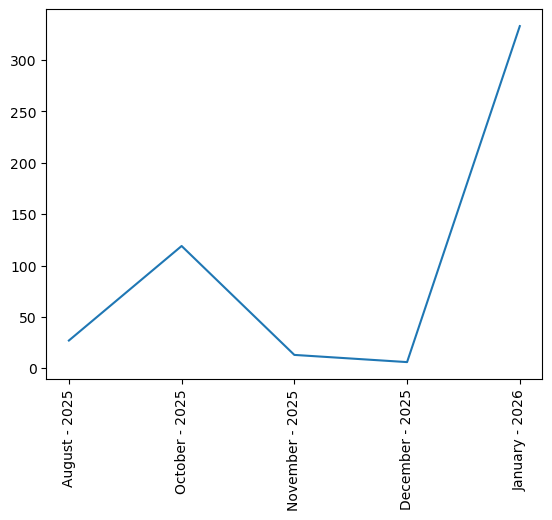

In [63]:
import matplotlib.pyplot as plt
plt.plot(timeline["times"] , timeline["messages"])
plt.xticks(rotation = "vertical")
plt.show()